# <p style="text-align: center;"> Final Project - Introduction to Data Science</p>
# <p style="text-align: center;"> <b> Data Pre-processing </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
|Tran Dinh Quang    | 21127406 |
|Nguyen Hong Hanh   | 21127503 |
|Do Quoc Tri  | 21127556 |
| Nguyen Khanh Nhan | 21127657         |


## Table of contents



---

## 0. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer

## 1. Load raw data

In [2]:
FILE_PATH = '../data/raw.csv'
df = pd.read_csv(FILE_PATH)

df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,severerisk
0,2009-09-27,1253984400,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,...,1254004923,17:46:17,1254048377,0.27,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
1,2009-09-28,1254070800,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,...,1254091320,17:45:39,1254134739,0.30,Overcast,Cloudy skies throughout the day.,cloudy,['48900099999'],obs,NaN
2,2009-09-29,1254157200,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,...,1254177718,17:45:01,1254221101,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
3,2009-09-30,1254243600,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,...,1254264116,17:44:24,1254307464,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
4,2009-10-01,1254330000,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,...,1254350514,17:43:46,1254393826,0.40,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN


## 2. Data cleaning

### 2.1 Add - Remove columns

**Numeric data:**

*   'datetime', 'dateEpoch': the purpose of the problem is to rely on environmental data to predict the weather at that specific time. Therefore, when it comes to time, we will use a column for  month for analysis instead of storing a specific date
*   'precip', 'precipprob', 'precipcover': remove because, for the data of precipitation, we have a column 'preciptype' with only 2 values: 'rain' or null, and others are equal 0 when 'preciptype' is null. It's possible to consider merging these columns into one 'preciptype' column with boolean data type (0: null, 1: rain)
*   'sunrise', 'sunset', 'sunriseEpoch', 'sunsetEpoch': for the sunrise and sunset times, we will store as the number of seconds since 00:00 so that it will be convenient when analyze the relationships between these two columns and the remaining columns in the dataframe
*   'snow', 'snowdepth': as the data is obtained from Ho Chi Minh City, Vietnam, a city where snowfall never occurs, we will remove columns related to snow with a high number of missing values
*   'windgust', 'severerisk': remove due to a high percentage of missing values (90%) and lack of meaningful relevance to the posed problem

In [ ]:
df['month'] = pd.to_datetime(df['datetime']).dt.month

# df['preciptype'][115] là chỗ ['rain'], để == ['rain'] thì nó không nhận ra?
df['preciptype'] = [1 if i == df['preciptype'][115] else 0 for i in df['preciptype']]

df['sunrise'] = pd.to_datetime(df['sunrise'])

df['sunrise'] = df['sunrise'].dt.hour * 3600 + df['sunrise'].dt.minute * 60 + df['sunrise'].dt.second

df['sunset'] = pd.to_datetime(df['sunset'])

df['sunset'] = df['sunset'].dt.hour * 3600 + df['sunset'].dt.minute * 60 + df['sunset'].dt.second

drop_columns = ['datetime', 'datetimeEpoch','precip', 'precipprob', 'precipcover', 'windgust', 'sunriseEpoch', 'sunsetEpoch', 'snow', 'snowdepth', 'severerisk']

df = df.drop(columns=drop_columns, axis=1)

df.head()

**Categorical data**

*   'description', 'conditons': remove because we only need one column with good classification properties to serve as the label ('icon')
*   'stations': remove as its values are complex and not helpful for this project
*   'source': remove as it has only one unique value

In [4]:
drop_columns = ['description', 'conditions', 'stations', 'source']

df = df.drop(columns=drop_columns, axis=1)

df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,icon,month
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,0,18.3,...,87.9,5.6,NaN,NaN,NaN,20523,63977,0.27,partly-cloudy-day,9
1,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,0,13.9,...,90.4,6.6,NaN,NaN,NaN,20520,63939,0.30,cloudy,9
2,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,0,16.1,...,82.1,6.6,NaN,NaN,NaN,20518,63901,0.34,partly-cloudy-day,9
3,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,0,17.2,...,90.0,5.7,NaN,NaN,NaN,20516,63864,0.37,partly-cloudy-day,9
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,0,12.8,...,70.8,6.6,NaN,NaN,NaN,20514,63826,0.40,partly-cloudy-day,10


# Encode categorical columns

In [5]:
df.dtypes

tempmax           float64
tempmin           float64
temp              float64
feelslikemax      float64
feelslikemin      float64
feelslike         float64
dew               float64
humidity          float64
preciptype          int64
windspeed         float64
winddir           float64
pressure          float64
cloudcover        float64
visibility        float64
solarradiation    float64
solarenergy       float64
uvindex           float64
sunrise             int32
sunset              int32
moonphase         float64
icon               object
month               int32
dtype: object

In [6]:
#One-hot encoding
df = pd.get_dummies(df, prefix='icon')

df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,solarenergy,uvindex,sunrise,sunset,moonphase,month,icon_clear-day,icon_cloudy,icon_partly-cloudy-day,icon_rain
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,0,18.3,...,NaN,NaN,20523,63977,0.27,9,False,False,True,False
1,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,0,13.9,...,NaN,NaN,20520,63939,0.30,9,False,True,False,False
2,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,0,16.1,...,NaN,NaN,20518,63901,0.34,9,False,False,True,False
3,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,0,17.2,...,NaN,NaN,20516,63864,0.37,9,False,False,True,False
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,0,12.8,...,NaN,NaN,20514,63826,0.40,10,False,False,True,False


# Detect outlier

In [7]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,month
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,...,4999.000000,5000.000000,5000.000000,4904.000000,4904.000000,4904.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,91.041220,76.14564,82.354120,99.919340,76.942880,87.187940,73.726820,77.205960,0.62780,12.067560,...,1008.960392,56.483300,6.055920,205.420310,17.744168,7.201876,20974.707800,64603.808400,0.483794,6.501000
std,3.281317,3.21651,2.659416,5.709696,4.945019,5.232159,3.837916,9.359366,0.48344,3.317442,...,2.042986,14.138278,1.174452,59.917768,5.181503,2.019694,884.759487,1006.387513,0.288521,3.480693
min,73.600000,44.50000,71.700000,73.600000,41.200000,71.700000,54.100000,49.500000,0.00000,4.500000,...,1000.500000,12.900000,3.200000,15.000000,1.300000,1.000000,19777.000000,62796.000000,0.000000,1.000000
25%,89.600000,74.37500,80.700000,96.400000,74.375000,83.575000,71.800000,70.800000,0.00000,9.800000,...,1007.600000,46.700000,5.800000,155.975000,13.500000,6.000000,20388.000000,63715.750000,0.250000,3.000000
50%,91.400000,76.90000,82.400000,100.300000,76.900000,86.800000,74.800000,77.900000,1.00000,11.400000,...,1008.800000,55.400000,6.100000,204.700000,17.700000,7.000000,20608.000000,64989.500000,0.480000,6.000000
75%,93.200000,78.70000,84.100000,103.900000,78.700000,90.400000,76.500000,84.300000,1.00000,13.900000,...,1010.300000,65.900000,6.400000,255.400000,22.000000,9.000000,21733.000000,65337.000000,0.750000,10.000000
max,100.500000,85.90000,90.500000,119.700000,100.300000,106.900000,81.400000,99.800000,1.00000,31.100000,...,1015.800000,100.000000,47.600000,324.200000,28.000000,10.000000,22618.000000,66006.000000,0.980000,12.000000


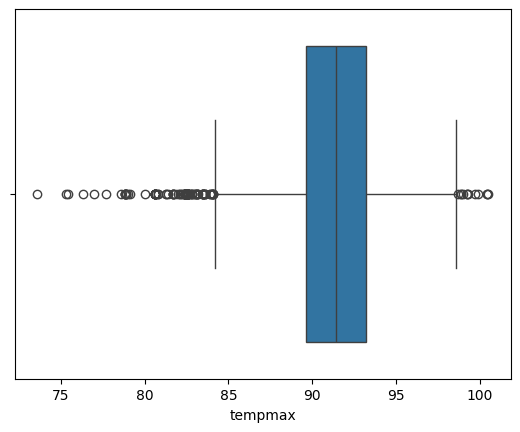

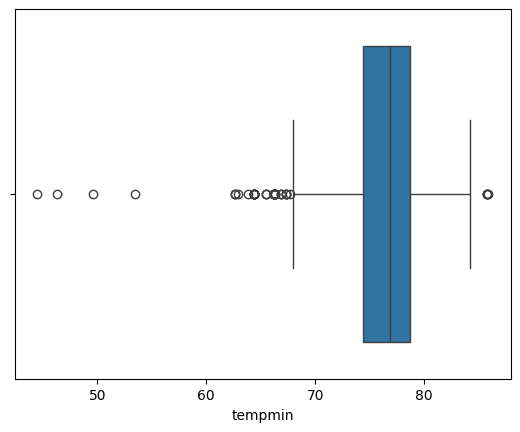

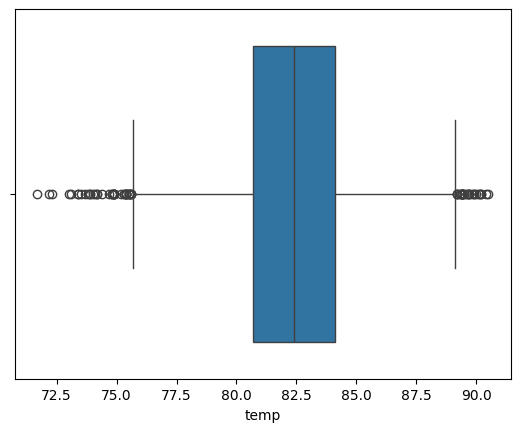

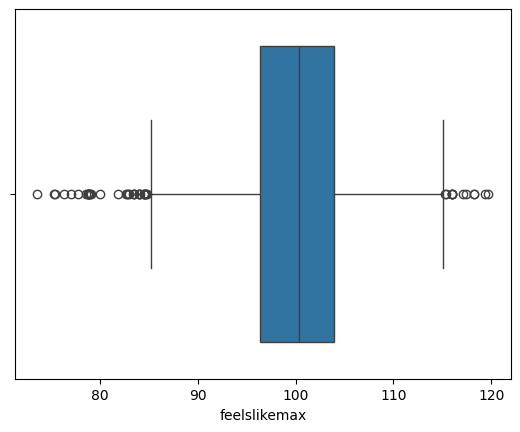

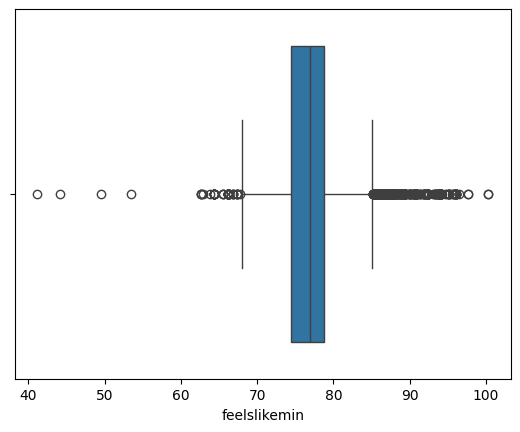

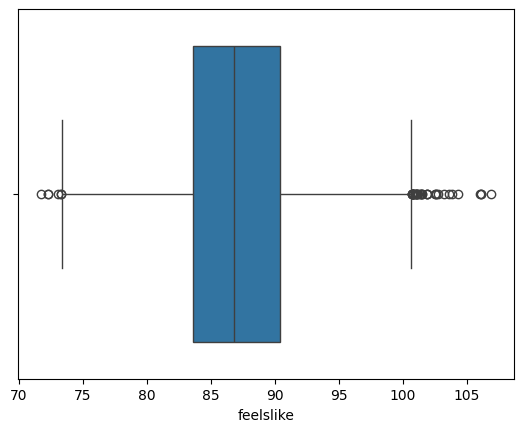

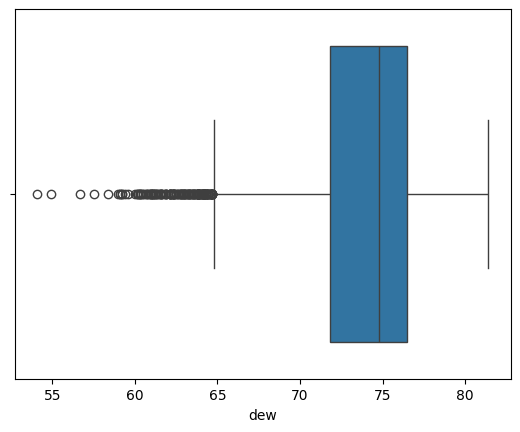

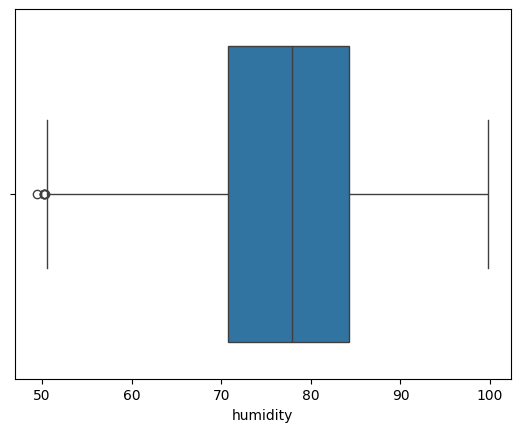

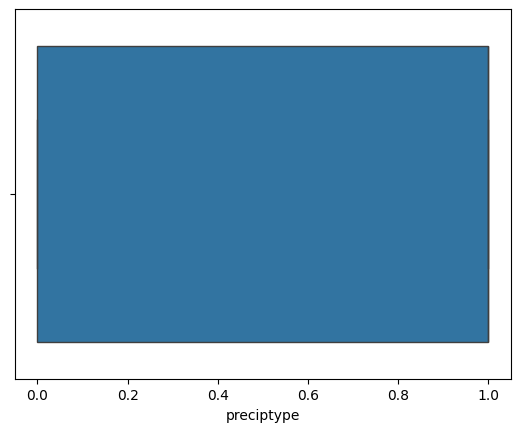

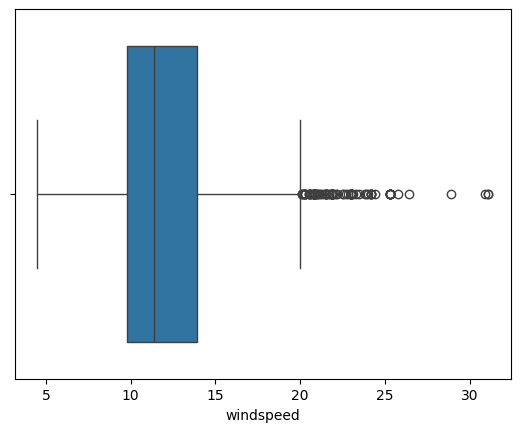

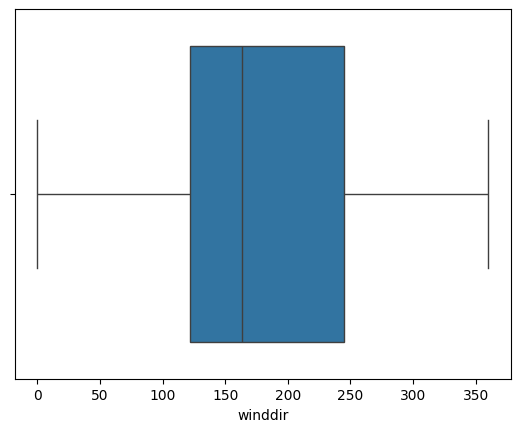

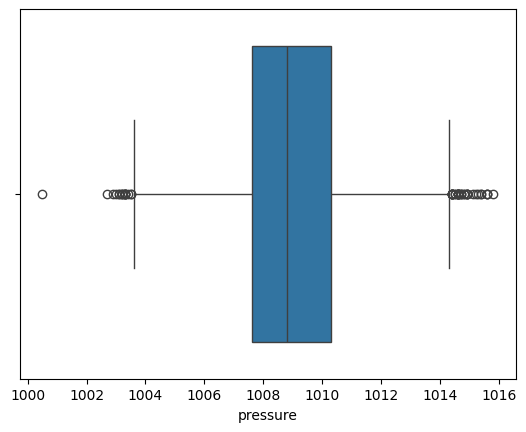

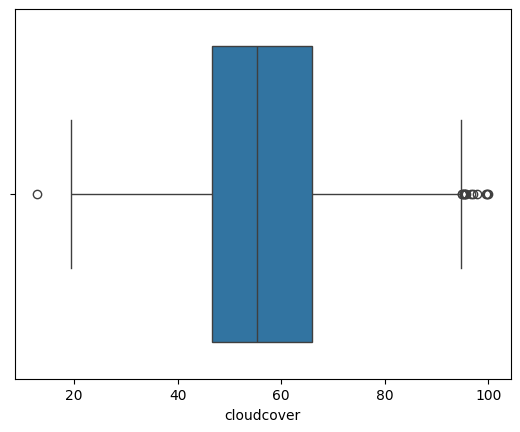

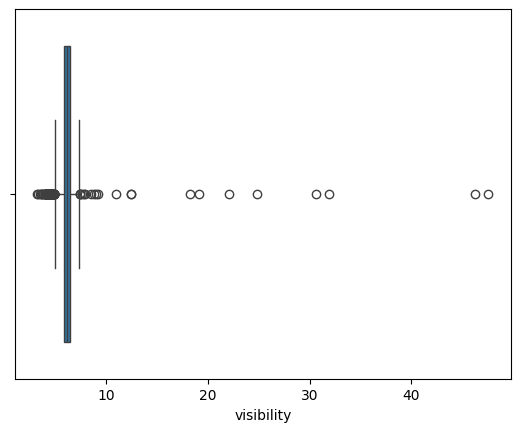

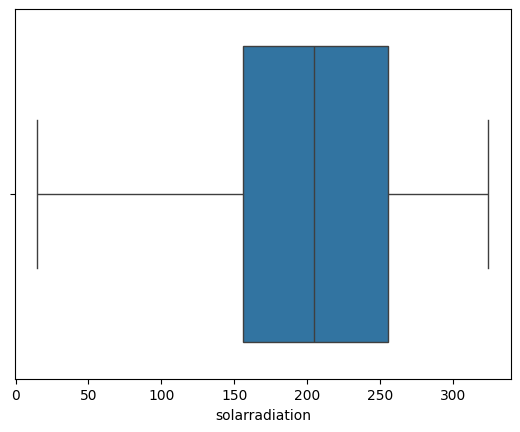

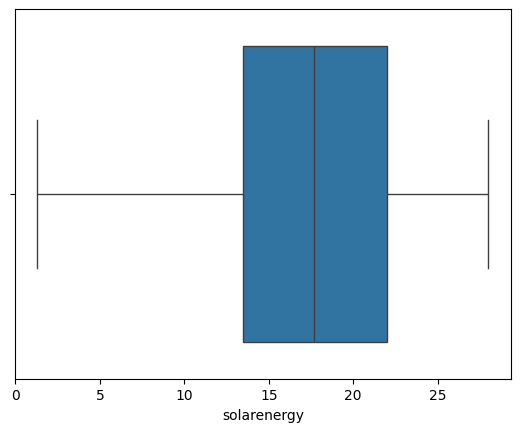

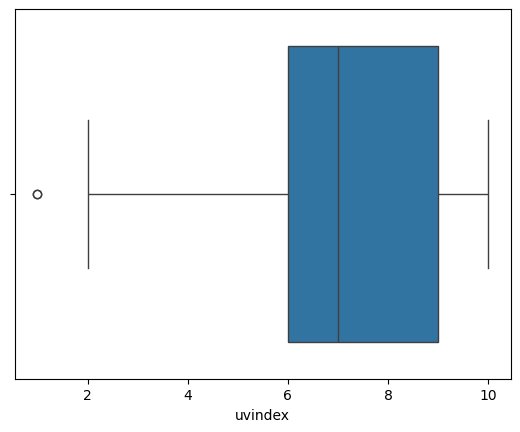

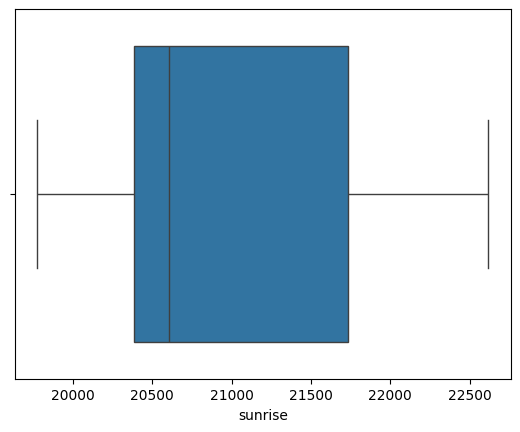

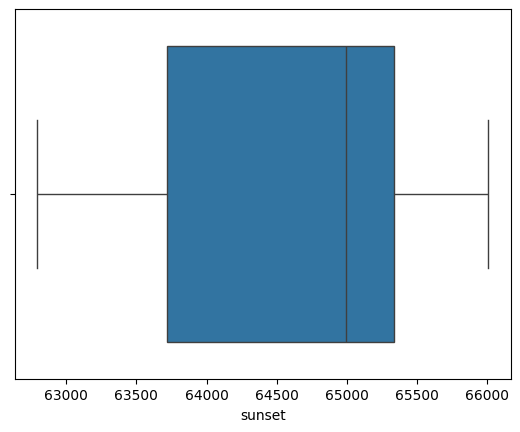

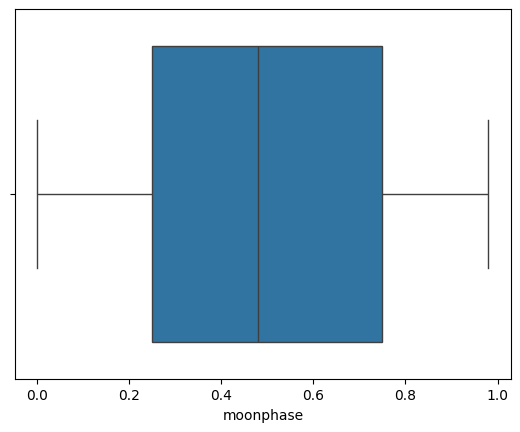

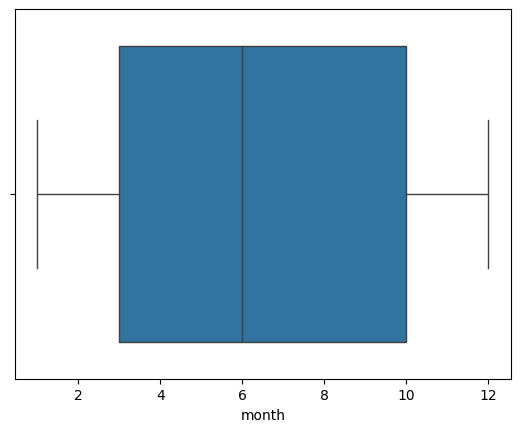

In [8]:
for col in df.drop(columns=['icon_clear-day', 'icon_cloudy', 'icon_partly-cloudy-day', 'icon_rain']).columns:
    sns.boxplot(x = df.drop_duplicates()[col])
    plt.show()

Remove extreme outliers in 'visibility' column

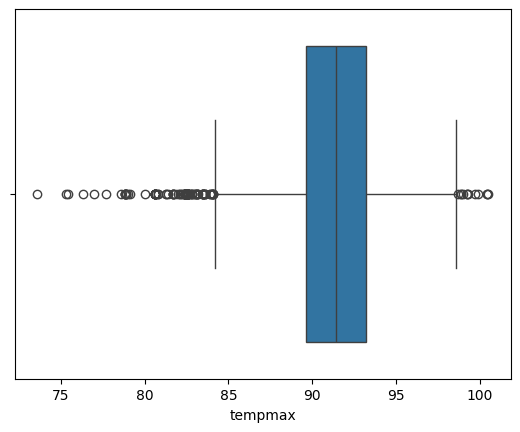

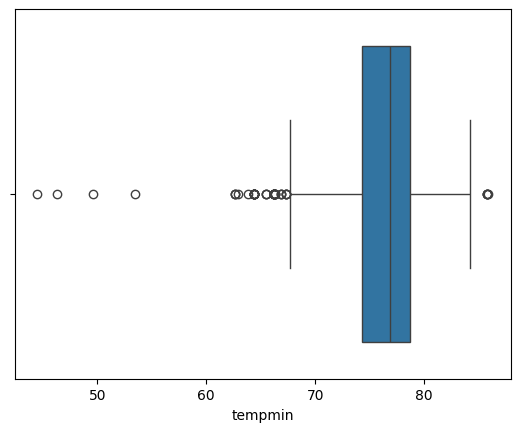

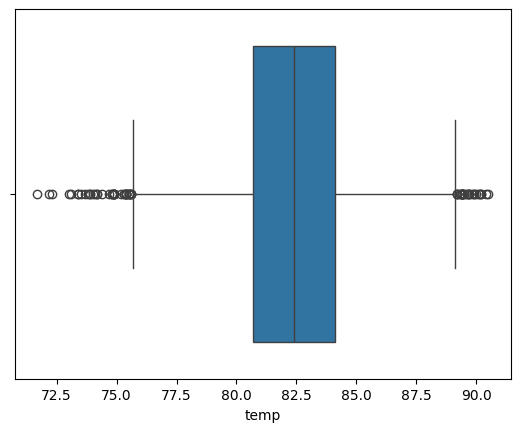

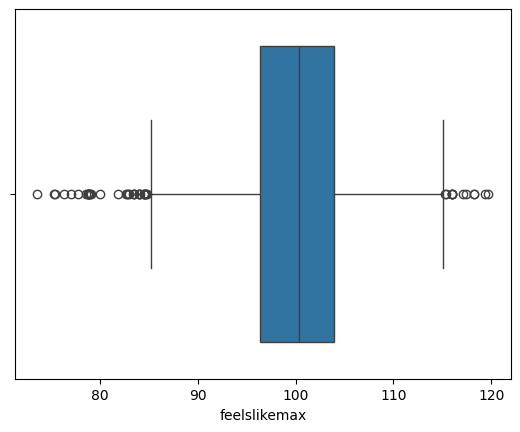

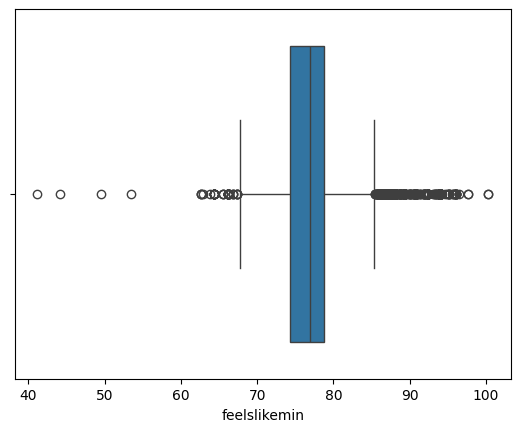

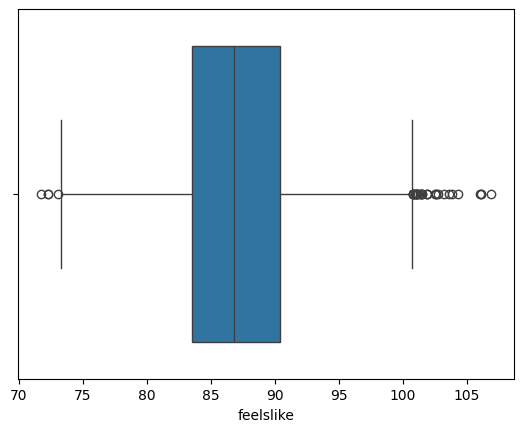

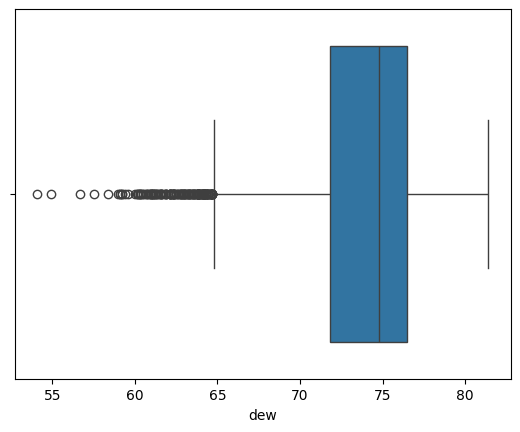

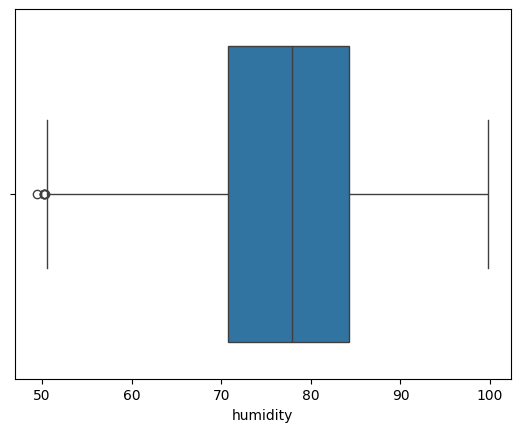

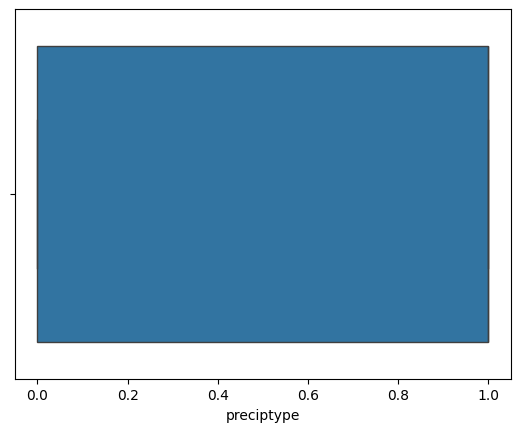

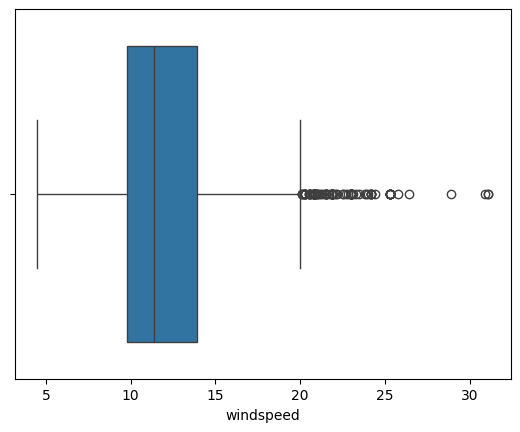

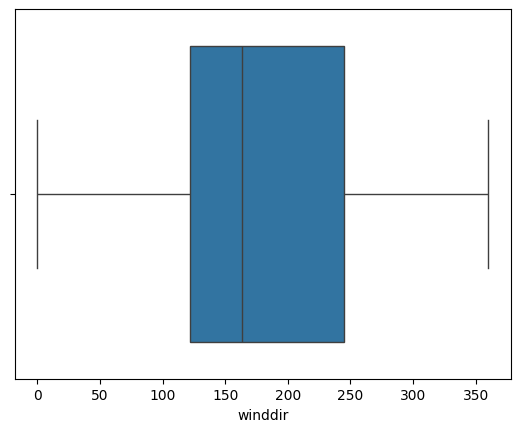

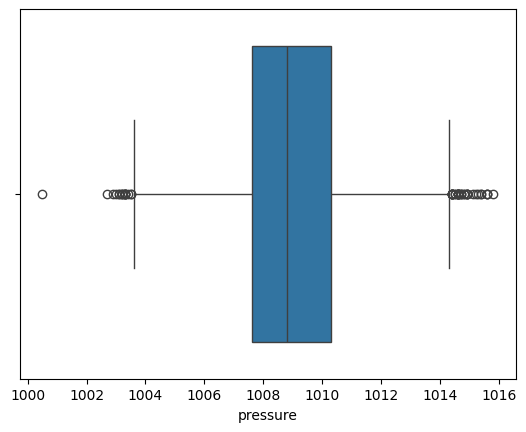

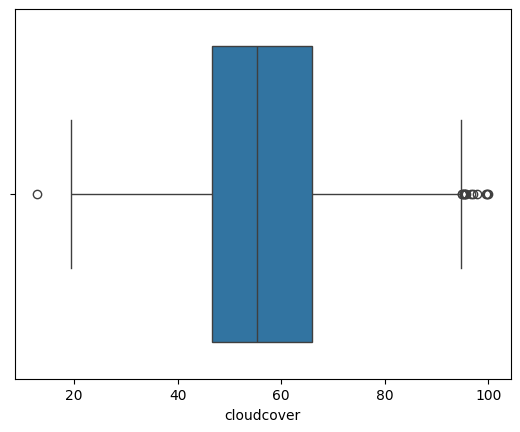

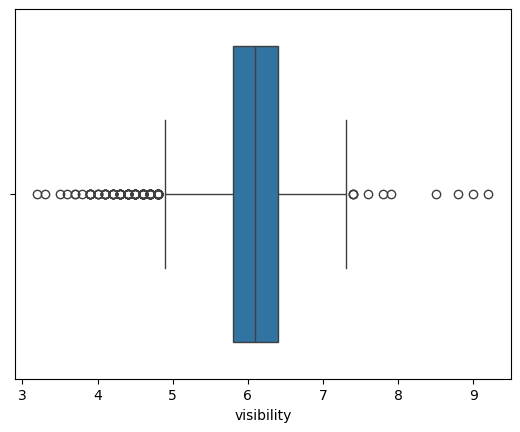

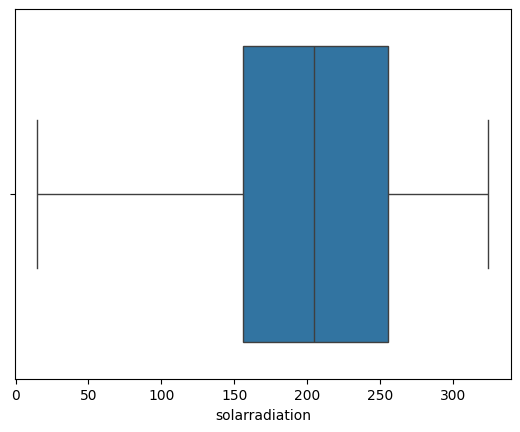

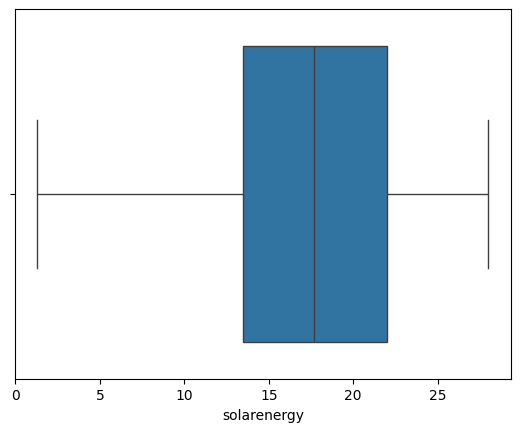

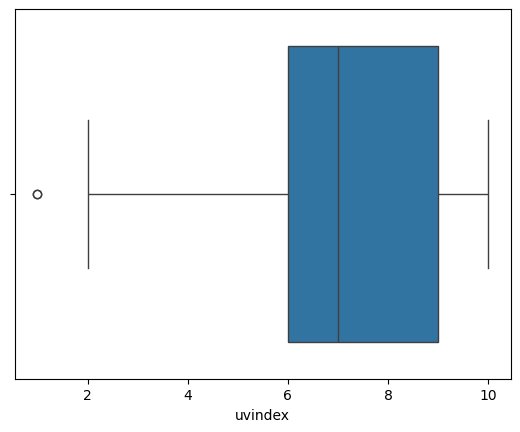

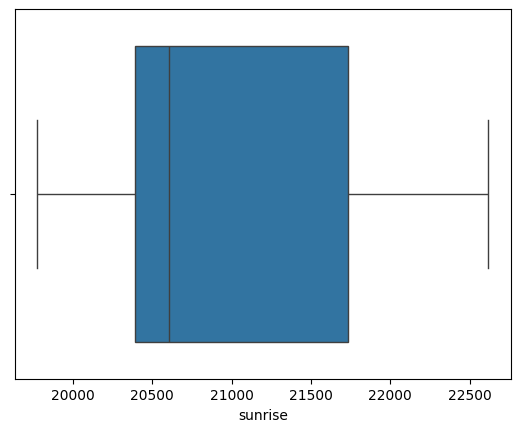

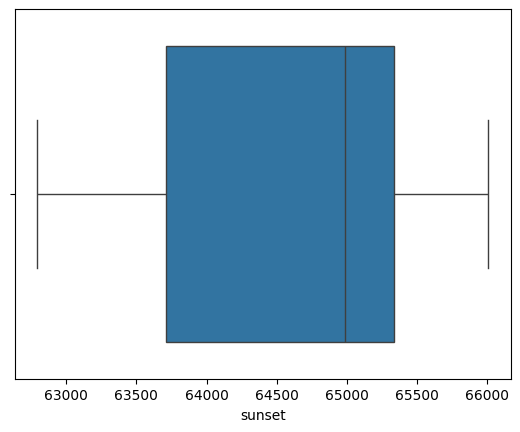

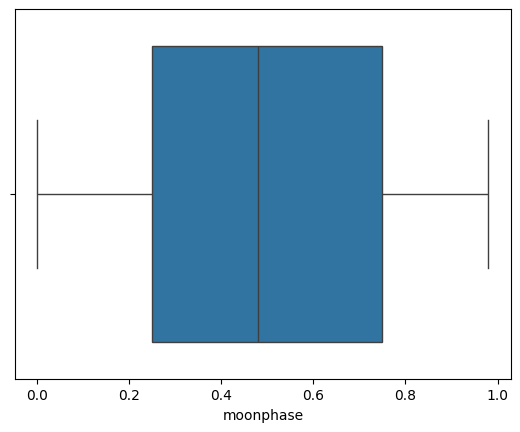

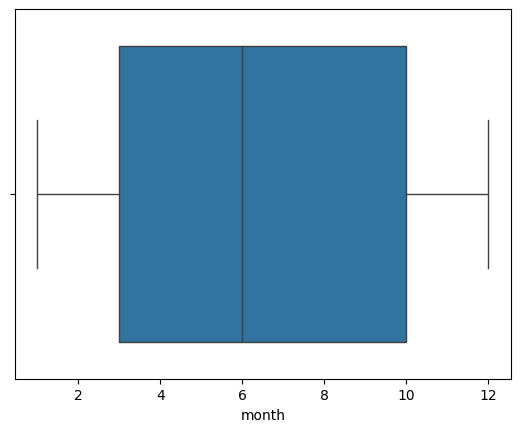

In [9]:
threshold = 3

z_scores = stats.zscore(df['visibility'])

df = df[(z_scores < threshold) & (z_scores > -threshold)]

for col in df.drop(columns=['icon_clear-day', 'icon_cloudy', 'icon_partly-cloudy-day', 'icon_rain']).columns:
    sns.boxplot(x = df.drop_duplicates()[col])
    plt.show()

# Missing values

Find a suitable method for handling missing values for the remaining columns



In [10]:
missing_values_per_column = df.isnull().sum()

print(missing_values_per_column)

tempmax                    0
tempmin                    0
temp                       0
feelslikemax               0
feelslikemin               0
feelslike                  0
dew                        0
humidity                   0
preciptype                 0
windspeed                  0
winddir                    0
pressure                   1
cloudcover                 0
visibility                 0
solarradiation            96
solarenergy               96
uvindex                   96
sunrise                    0
sunset                     0
moonphase                  0
month                      0
icon_clear-day             0
icon_cloudy                0
icon_partly-cloudy-day     0
icon_rain                  0
dtype: int64


In [11]:
k_neighbors = 5

knn_imputer = KNNImputer(n_neighbors=k_neighbors)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

In [12]:
df_imputed.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,solarenergy,uvindex,sunrise,sunset,moonphase,month,icon_clear-day,icon_cloudy,icon_partly-cloudy-day,icon_rain
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,0.0,18.3,...,12.26,5.2,20523.0,63977.0,0.27,9.0,0.0,0.0,1.0,0.0
1,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,0.0,13.9,...,13.38,5.6,20520.0,63939.0,0.30,9.0,0.0,1.0,0.0,0.0
2,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,0.0,16.1,...,14.10,6.0,20518.0,63901.0,0.34,9.0,0.0,0.0,1.0,0.0
3,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,0.0,17.2,...,17.08,7.8,20516.0,63864.0,0.37,9.0,0.0,0.0,1.0,0.0
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,0.0,12.8,...,14.62,6.2,20514.0,63826.0,0.40,10.0,0.0,0.0,1.0,0.0


# Remove unnecessary variables (check multicollinearity)

In [13]:
df_imputed.corr()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,solarenergy,uvindex,sunrise,sunset,moonphase,month,icon_clear-day,icon_cloudy,icon_partly-cloudy-day,icon_rain
tempmax,1.000000,0.500514,0.838244,0.603612,0.510963,0.694326,0.034280,-0.512143,-0.198394,0.088355,...,0.405215,0.346158,-0.147784,0.299787,0.016229,-0.323585,0.012858,-0.026930,0.199048,-0.198727
tempmin,0.500514,1.000000,0.796474,0.661084,0.923119,0.822876,0.543911,-0.014238,0.196760,0.166733,...,0.014228,-0.015014,-0.486452,0.321379,0.009772,-0.057001,-0.028287,-0.003724,-0.195429,0.196645
temp,0.838244,0.796474,1.000000,0.685205,0.775657,0.922644,0.293029,-0.385462,-0.029829,0.083441,...,0.266791,0.217042,-0.342634,0.320300,0.009904,-0.195825,-0.015851,-0.014666,0.031253,-0.030158
feelslikemax,0.603612,0.661084,0.685205,1.000000,0.611659,0.830413,0.732453,0.250894,0.336881,0.255346,...,-0.111304,-0.141321,-0.673098,0.417277,0.002493,0.045999,-0.028807,-0.014667,-0.336469,0.337981
feelslikemin,0.510963,0.923119,0.775657,0.611659,1.000000,0.826270,0.457800,-0.082355,0.121600,0.126955,...,0.069662,0.044173,-0.438865,0.311004,0.009999,-0.108657,-0.021630,-0.004708,-0.119898,0.120892
feelslike,0.694326,0.822876,0.922644,0.830413,0.826270,1.000000,0.560161,-0.083141,0.173440,0.124263,...,0.063878,0.028868,-0.543780,0.367171,0.004444,-0.068687,-0.026167,-0.012145,-0.172095,0.173477
dew,0.034280,0.543911,0.293029,0.732453,0.457800,0.560161,1.000000,0.765388,0.592653,0.201479,...,-0.449849,-0.449292,-0.748503,0.227704,-0.004275,0.342235,-0.051484,0.007289,-0.591764,0.593488
humidity,-0.512143,-0.014238,-0.385462,0.250894,-0.082355,-0.083141,0.765388,1.000000,0.588307,0.146559,...,-0.605508,-0.574593,-0.495842,0.012247,-0.010379,0.454024,-0.035065,0.016951,-0.588523,0.589287
preciptype,-0.198394,0.196760,-0.029829,0.336881,0.121600,0.173440,0.592653,0.588307,1.000000,0.174173,...,-0.554534,-0.522249,-0.568011,0.120353,-0.012540,0.369284,-0.025963,-0.018357,-0.996573,0.997861
windspeed,0.088355,0.166733,0.083441,0.255346,0.126955,0.124263,0.201479,0.146559,0.174173,1.000000,...,-0.109028,-0.134296,-0.278674,0.453878,-0.015159,-0.114122,0.002953,0.007853,-0.175175,0.174767


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
target = ['icon_clear-day', 'icon_cloudy', 'icon_partly-cloudy-day', 'icon_rain']
features = df_imputed.columns.drop(target)
X = df_imputed[features]
y = df_imputed[target]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [16]:
vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled.sort_values("VIF", ascending=False))

           Feature          VIF
14  solarradiation  2626.154896
15     solarenergy  2597.759349
6              dew   190.605460
7         humidity   180.053559
2             temp    99.726694
5        feelslike    38.164196
1          tempmin    14.327363
16         uvindex    12.334616
3     feelslikemax    11.216227
4     feelslikemin    11.159344
0          tempmax    10.379614
17         sunrise     4.063520
18          sunset     3.395886
20           month     3.047199
12      cloudcover     2.553733
11        pressure     2.230853
8       preciptype     2.105693
13      visibility     1.560347
10         winddir     1.556756
9        windspeed     1.453844
19       moonphase     1.003831


In [17]:
high_vif_cols = vif_data_scaled[vif_data_scaled["VIF"] > 5]
print(high_vif_cols.sort_values("VIF", ascending=False))

           Feature          VIF
14  solarradiation  2626.154896
15     solarenergy  2597.759349
6              dew   190.605460
7         humidity   180.053559
2             temp    99.726694
5        feelslike    38.164196
1          tempmin    14.327363
16         uvindex    12.334616
3     feelslikemax    11.216227
4     feelslikemin    11.159344
0          tempmax    10.379614


Remove high VIF columns sequencely

In [18]:
X = X.loc[:, X.columns != 'solarradiation']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature         VIF
0        tempmax   10.379285
1        tempmin   14.321063
2           temp   99.654848
3   feelslikemax   11.216184
4   feelslikemin   11.147880
5      feelslike   38.116810
6            dew  190.596289
7       humidity  180.042139
8     preciptype    2.105693
9      windspeed    1.453831
10       winddir    1.556003
11      pressure    2.228028
12    cloudcover    2.551197
13    visibility    1.560345
14   solarenergy   13.529273
15       uvindex   12.193107
16       sunrise    4.061673
17        sunset    3.391123
18     moonphase    1.003829
19         month    3.046797


In [19]:
X = X.loc[:, X.columns != 'solarenergy']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature         VIF
0        tempmax   10.358499
1        tempmin   14.317185
2           temp   98.944993
3   feelslikemax   11.197481
4   feelslikemin   11.146664
5      feelslike   37.869576
6            dew  190.466687
7       humidity  179.743408
8     preciptype    2.051666
9      windspeed    1.453789
10       winddir    1.554333
11      pressure    2.224459
12    cloudcover    2.518674
13    visibility    1.559150
14       uvindex    1.790097
15       sunrise    4.023489
16        sunset    3.356987
17     moonphase    1.003605
18         month    3.044351


In [20]:
X = X.loc[:, X.columns != 'dew']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature        VIF
0        tempmax   9.825111
1        tempmin  13.465840
2           temp  44.977423
3   feelslikemax  11.023060
4   feelslikemin  10.596010
5      feelslike  33.183657
6       humidity   7.936675
7     preciptype   2.051628
8      windspeed   1.446921
9        winddir   1.554330
10      pressure   2.223988
11    cloudcover   2.507031
12    visibility   1.525159
13       uvindex   1.790089
14       sunrise   3.989656
15        sunset   3.349008
16     moonphase   1.003512
17         month   3.036829


In [21]:
X = X.loc[:, X.columns != 'feelslike']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature        VIF
0        tempmax   7.610840
1        tempmin  10.151699
2           temp  13.740887
3   feelslikemax   8.091478
4   feelslikemin   7.314723
5       humidity   7.501427
6     preciptype   2.035437
7      windspeed   1.430185
8        winddir   1.551373
9       pressure   2.221328
10    cloudcover   2.466279
11    visibility   1.522741
12       uvindex   1.782361
13       sunrise   3.980435
14        sunset   3.348608
15     moonphase   1.003474
16         month   3.028629


In [22]:
X = X.loc[:, X.columns != 'feelslikemax']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature        VIF
0        tempmax   5.272422
1        tempmin  10.130475
2           temp  12.144948
3   feelslikemin   7.307828
4       humidity   4.167561
5     preciptype   2.029580
6      windspeed   1.426259
7        winddir   1.548245
8       pressure   2.218243
9     cloudcover   2.462696
10    visibility   1.521405
11       uvindex   1.782186
12       sunrise   3.929048
13        sunset   3.286960
14     moonphase   1.003328
15         month   3.016738


In [23]:
X = X.loc[:, X.columns != 'feelslikemin']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

       Feature        VIF
0      tempmax   5.269056
1      tempmin   4.750011
2         temp  12.125314
3     humidity   4.147998
4   preciptype   2.017507
5    windspeed   1.419385
6      winddir   1.548245
7     pressure   2.213139
8   cloudcover   2.459741
9   visibility   1.520756
10     uvindex   1.776203
11     sunrise   3.870454
12      sunset   3.277679
13   moonphase   1.003324
14       month   2.979507


In [24]:
X = X.loc[:, X.columns != 'temp']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

       Feature       VIF
0      tempmax  2.750320
1      tempmin  1.861208
2     humidity  3.648252
3   preciptype  2.005849
4    windspeed  1.379453
5      winddir  1.545008
6     pressure  2.175813
7   cloudcover  2.412059
8   visibility  1.508123
9      uvindex  1.775778
10     sunrise  3.697932
11      sunset  3.277309
12   moonphase  1.003146
13       month  2.969618


In [25]:
df = df_imputed[X.columns]

df.to_csv('../data/processed_data.csv', index=False)

df.head()

,tempmax,tempmin,humidity,preciptype,windspeed,winddir,pressure,cloudcover,visibility,uvindex,sunrise,sunset,moonphase,month
0,87.9,73.5,93.0,0.0,18.3,263.1,1005.5,87.9,5.6,5.2,20523.0,63977.0,0.27,9.0
1,84.8,75.3,88.4,0.0,13.9,258.8,1003.1,90.4,6.6,5.6,20520.0,63939.0,0.30,9.0
2,84.5,77.1,87.0,0.0,16.1,251.4,1000.5,82.1,6.6,6.0,20518.0,63901.0,0.34,9.0
3,87.9,74.6,91.7,0.0,17.2,260.5,1002.7,90.0,5.7,7.8,20516.0,63864.0,0.37,9.0
4,89.7,75.3,87.2,0.0,12.8,234.3,1006.0,70.8,6.6,6.2,20514.0,63826.0,0.40,10.0


# Conclusion

- Removed or converted columns with high missing values or those that did not contribute significantly in terms of meaning.
- In terms of outliers, since there are quite a few features with outliers and no domain knowledge available, only extreme outliers will be removed.
- Imputed missing values using KNN
- Handling multicollinearity